# Titanic 

### Przeanalizowanie zadania

Mam zamiar wyuczyc model, który przewidzi czy pasażer Titanica przeżyje.

Mamy tu do czynienia z klasycznym zadaniem uczenia nadzorowanego, poniewaz wykorzystujemy dane wejściowe z oznakowanymi etykietami zeby nauczyc model przewidywac wynik
Klasycznym przykładem uczenia nazdzorowanego jest klasyfikacja binarna która przewiduje jedną z dwóch klas (0 i 1). W tym przypadku przewidujemy wartość kategoryczną (dyskretną). Zmienna docelowa Survived przyjmuje dwie wartości 0( nie przeżył) lub 1 (przeżył)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.estimators import plot_learning_curve


%matplotlib inline

#### Wczytywanie danych

In [6]:
train  = pd.read_csv(r'D:\my projekt\Repo\Raspberry_pi\M_Olszewski-projects-portfolio\Titanic\input\titanic.train.csv')
test = pd.read_csv(r'D:\my projekt\Repo\Raspberry_pi\M_Olszewski-projects-portfolio\Titanic\input\titanic.test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


#### Analiza danych Treningowych 
Przeprowadze analize danych w celu zrozumienia struktury danych

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Wnioski z Analizy

W zbiorze treningowym mamy 891 wierszy i 12 cech

W zbiorze testowym mamy 418 wierszy i 11 cech (zostala usunieta wartosc docelowa)

Typy danych które znajduja sie w zbiorze treningowym to:
- 2 cechy z liczbami zmiennoprzecinkowymi
- 5 cech z liczbami naturalnymi 
- 5 cech z typem object, co oznacza ze mozna tu przechowywac dowolny obiekt, które po sprawdzeniu kilku losowych wartosci sa to zmienne tekstowe

W kolumnach Age, Cabin i Embarked brakuje wartości 

Po przyjrzeniu sie zbiorowi danychwartosci w kolumnie Sex,Pclass,Embarked,Survived,SibSp są powtarzalne to oznacza ze mamy do czynienia z atrybutami kategorialnymi.

### Analiza Danych Testowych

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Wizualizacja danych

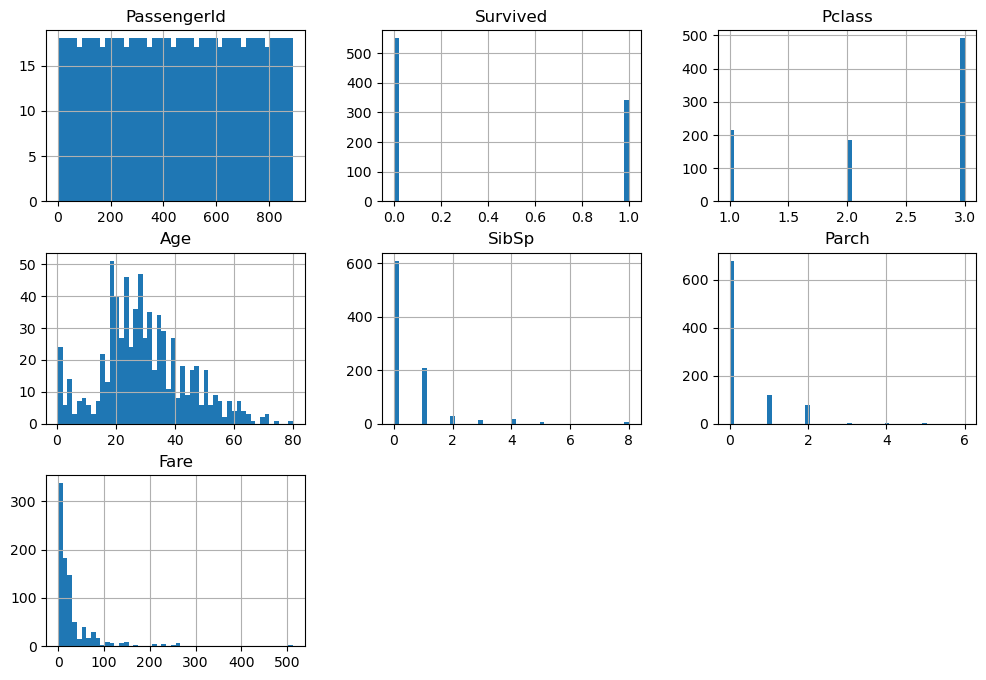

In [13]:
#histogramy przedstawiaja liczbe przykładów (w pionowej osi ) znajdujacych sie w okreslonym przedziale wartosci (os pozioma)

train.hist(bins = 50, figsize = (12,8))
plt.show()

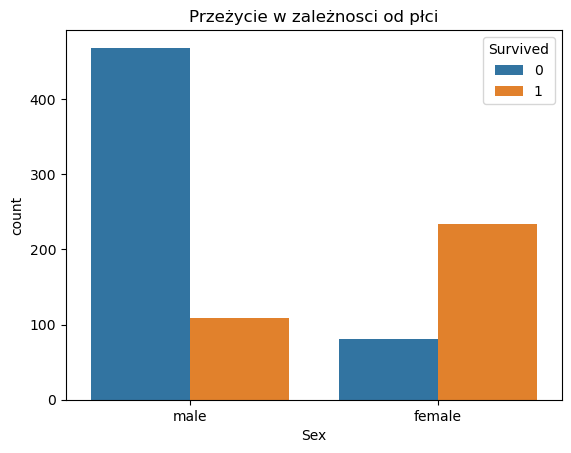

In [14]:
sns.countplot(x='Sex',hue ='Survived', data = train)
plt.title('Przeżycie w zależnosci od płci')
plt.show()

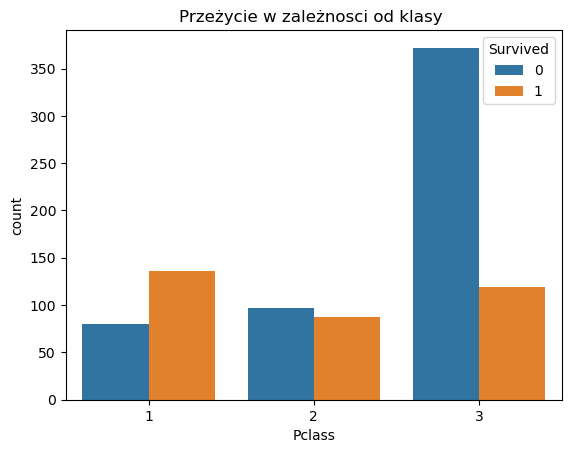

In [15]:
sns.countplot(x='Pclass',hue = "Survived", data = train)
plt.title('Przeżycie w zależnosci od klasy ')
plt.show()

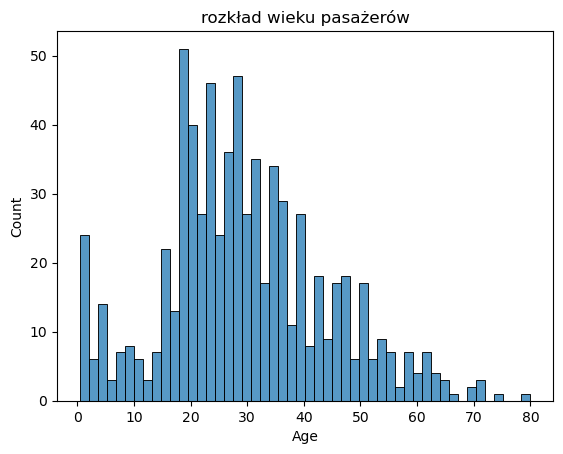

In [16]:
sns.histplot(train['Age'].dropna(), bins= 50)
plt.title('rozkład wieku pasażerów')
plt.show()

### Wnioski z Wizualizacji danych

- Wiecej osob zgineło niz przezyło
- Klasa 3 jest najliczniejsza
- Najlicznijszy przedział wieku na statku to około od 18 do 40 lat
- Wiekszosc pasarzerów na statku nie ma rodzenstwa małżonków, rodziców ani dzieci 
- Kobiety w znacznej wiekszosci przeżyły katastrofe
- Najwiecej ludzi zgineło z klasy 3

### Oczyszczanie danych 

Wiekszosc algorytmów uczenia maszynowego nie moze działac jesli brakuje jakichs cech istnieja trzy mozliwosci:
- pozbyc sie brakujących danych
- pozbyc sie całego atrybutu
- imputacja uzupełnic brakujace dane okreslona wartoscia (zero, srednia, mediana)

Na podstawie wyciagnietych wniosków najbardziej racjonalnym rozwiazaniem bedzie:
- kolumne Age uzupełnic brakujace wartosci mediana
- kolumne Cabin usunąc z powodu duzej liczby brakujących wartości
- kolumne Embarked uzupełnic najczesciej wystepująca wartoscią


In [17]:
#wypełniam puste miejsca w kolumnie Age mediana a w kolumnie Embarked najczesciej wystepowana wartoscia

train['Age'] = train["Age"].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

test['Age'] = test["Age"].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [18]:
#usuniecie kolumny Cabin
train.drop(['Cabin'],axis= 1, inplace = True)
test.drop(['Cabin'],axis= 1, inplace = True)


In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Zamiana wartosci kategorailnych na numeryczne
Algorytmy uczenia maszynowego lepiej sobie radza z liczbami, wiec koniecznie musze przekształcic dane kategorialne z tekstu na wartosci numeryczne.


In [20]:
#train['Sex'] = train['Sex'].map(lambda x: 0 if x=='male'else 1)
gender_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(gender_mapping)
test['Sex'] = test['Sex'].map(gender_mapping)

In [21]:
emb = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(emb)
test['Embarked'] = test['Embarked'].map(emb)


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


### Punkt odniesienia 
Zbuduje model który bedzie punktem odniesienia dla kolejnych kroków 

Podzieliłem zbiór danych na zestaw treningowy i walidacyjny mimo ze jest osobny zestaw testowy ponieważ:
- zbiór testowy nie zawiera kolumny docelowej Survived, oznacza to ze nie mozemy ocenic wydajnosci modelu na tym zbiorze
Podział zbioru treningowego na treningowy i walidacyjny pozwoli na rzetelną ocene modeli oraz jego optymalizacje przed koncowym przewidywaniem na zbiorze testowym.

Jest kilka metod podziału danych:
- najprostrza metoda jest losowy podział danych treningowych na dwa zbioy w poroporcji 80 od 20
- bardziej zaawansowaną metodą jest walidacja krzyzowa która polaga na podziale na k podzbiorów i iteracynym treningu i walidacji modelu, aby wykorzystac wszystkie dane efektywnie 

Walidacja krzyżowa jest lepsza metoda walidacji modelu niz prosty podział danych na zestaw treningowy i walidacyjny, zwłaszcza gdy dysponujemy ograniczoną iloscia danych. Ocena modelu opiera sie na sredniej wyników z kilku iteracji, jest mniej podatna na przypadkowe wahania wynikajace z pojedynczego podziału danych

Usune cechy takie Name, Ticket poniewaz sa one niewłasciwymi typami dla algorytmów uczenia maszynowego



In [ ]:
from sklearn.model_selection import cross_val_score 

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

X = train.drop(['Survived','Name','Ticket'], axis =1)
y = train['Survived']


In [2]:
cross_val_score(DummyClassifier(strategy='stratified',random_state= 42),X,y, scoring ='accuracy', cv=3).mean()

NameError: name 'cross_val_score' is not defined

DummyClassifier to bardzo prosty klasyfikator któy słuzy jako punkt odniesienia. 

In [3]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

NameError: name 'cross_val_score' is not defined

In [4]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

NameError: name 'cross_val_score' is not defined

Inna mozliwoscia jest walidacja danych za pomoca StratifiedKFold. Uzywany jest gdy rozkład klas w danych jest nierónomierny, zachowuje proporcje klas w kazdym foldzie. 

In [51]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=7, shuffle = True, random_state=42)

cross_val_score(DummyClassifier(strategy='stratified',random_state= 42),X,y, cv=skf).mean()


0.5240965973003374

In [52]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=skf).mean()

0.8192843082114737

In [53]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=skf).mean()

0.8271231721034872

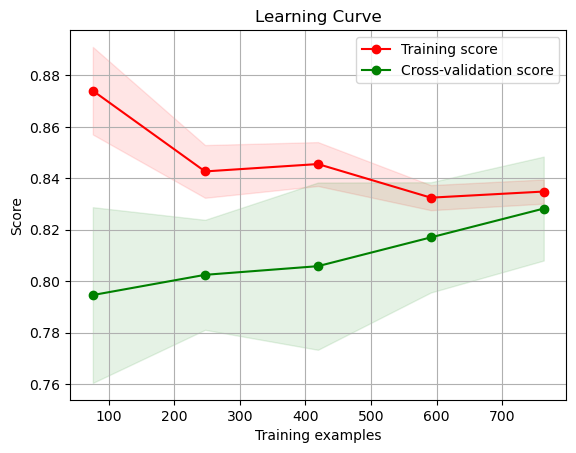

In [54]:
plot_learning_curve(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=skf);

Wykres przedstawia krzywą uczenia sie dla modelu RandomForestClassifier.
Mozemy zobaczyc jak model radzi sobie na zbiorze treningowym i walidacyjnym w zależnosci od liczby przykładów treningowych.
- czerwona linia przedstawia wynik modelu na zbiorze treningowym
- zielona linia przedstawia wynik modelu na zbiorze walidacyjnym uzyskany poprzez walidacje krzyzową
- obszary zaciennione przedstawiaja odchyylenia standarodwe dla obu krzywych

#### Interpretacja wyniku
Wynik na zbiorze treningowym (czerowona linia)
- Poczatkowo przy mniejszych zbiorach treningowych (100-200 przykładów), model osiaga bardzo wysoką skutecznosc na zbiorze treningowym (ok. 0,88). Lecz w miare zwiekszenia liczby przykładów treningowych, wynik na zbiorze treningowym spada (ok. 0,83) ale stabilizuje sie przy wiekszych rozmiarach zestawu danych (od ok 400 przykładów). Ten spadek wynika z tego że przy wiekszych zestawach danych model musi dopasowywac bardziej zróżnicowane przypadki.
Wyniki na zbiorze walidacyjnym 
- Wynik walidacyjny zaczyna od wartości około 0.78 i stopniowo rośnie do około 0.82, co pokazuje, że model poprawia swoją zdolność, gdy liczba przykładów treningowych wzrasta. Krzywa ta rośnie powoli i stabilnie, co sugeruje, że model potrzebuje więcej danych. Warto zauważyć, że wyniki walidacyjne są mniej stabilne (większe odchylenie standardowe), co jest widoczne na zacieniowanym obszarze wokół zielonej linii.

Poprzez zastosowanie StratifiedKFold podniosła sie poprawnosc modelu.

### Tworzenie nowych cech 

towrzenie

In [23]:
train['title'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
train['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [24]:
from collections import defaultdict


top_titles = list(train['title'].value_counts().head(6).keys()) # tworz liste tytułów pasażerów która zlicza wystapienia,
# wybiera pierwsze 6 i zwraca tytuły(klucze) 

title_norm = defaultdict(lambda: 'other', dict(zip(top_titles, top_titles))) #funkcja łaczy 2 listy poprzez zip i tworzy słownik z (klucz, wartosc)
# tworzy słownik który zwroci domyslna wartośc other dla kluczy które nie istnieja 
train['title_norm'] = train['title'].map(title_norm)

train['title_norm'].value_counts()

title_norm
Mr        517
Miss      182
Mrs       125
Master     40
other      14
Dr          7
Rev         6
Name: count, dtype: int64

In [25]:
train['title_norm'] = train['title_norm'].factorize()[0] #konwertuje dane na liczby 


In [80]:
train['title_norm'].value_counts()

KeyError: 'title_norm'

In [34]:
X = train.drop(['Survived','Name','Ticket','title'], axis =1)
y = train['Survived']


In [35]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=skf).mean()

0.8114366563554557

In [36]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=skf).mean()

0.805865087176603

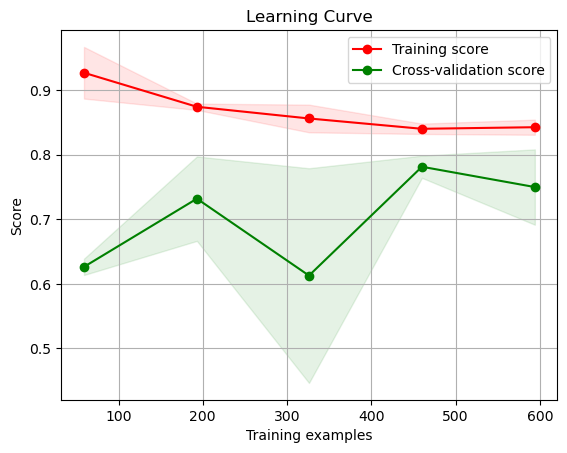

In [39]:
from scikitplot.estimators import plot_learning_curve

plot_learning_curve(DecisionTreeClassifier(max_depth=4, random_state=42), X, y, cv=3);